# Task 1

In [41]:
from utils import *
from MySolution import MyClassifier, MyClustering
from sklearn.decomposition import PCA

## Synthetic Data

In [42]:
syn_data = prepare_synthetic_data()
X_train, y_train = syn_data['trainX'], syn_data['trainY']
X_test, y_test = syn_data['testX'], syn_data['testY']

In [43]:
clf_syn = MyClassifier()
clf_syn.train(X_train, y_train)
y_pred = clf_syn.predict(X_test)

In [44]:
acc_syn = clf_syn.evaluate(X_test, y_test)
print(f"Accuracy: {acc_syn*100:.2f}%")

Accuracy: 97.20%


### Confusion Matrix

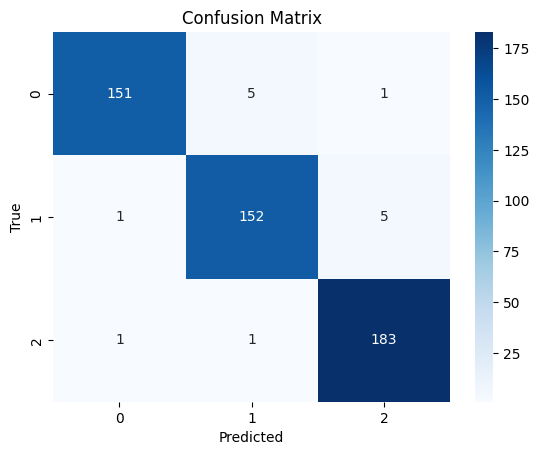

In [45]:
clf_syn.plot_confusion_matrix(y_pred, y_test)

### Decision Boundary

#### Training Split

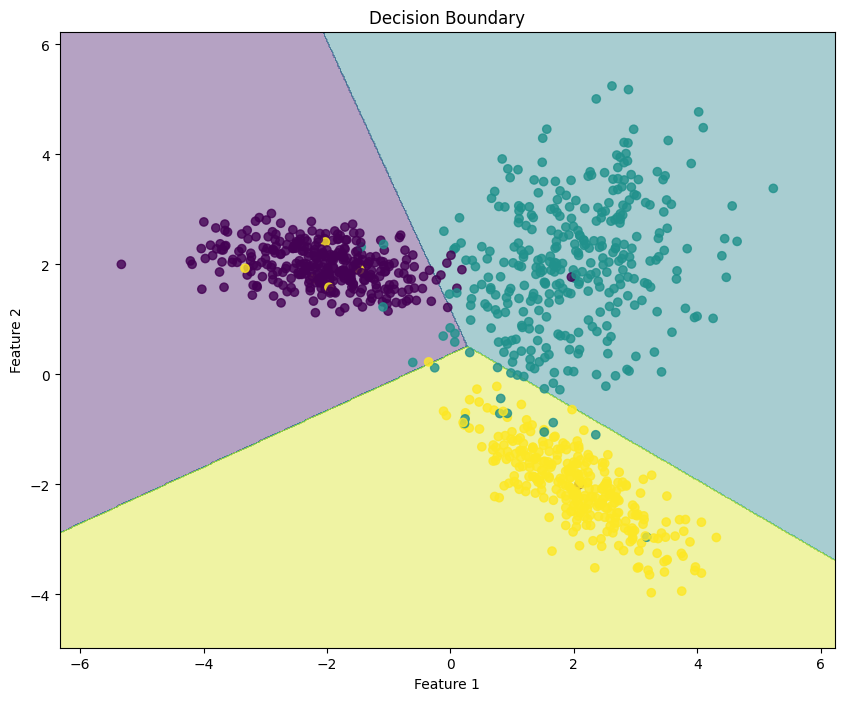

In [46]:
clf_syn.plot_decision_boundary(X_train, y_train, title="Decision Boundary")

#### Test Split

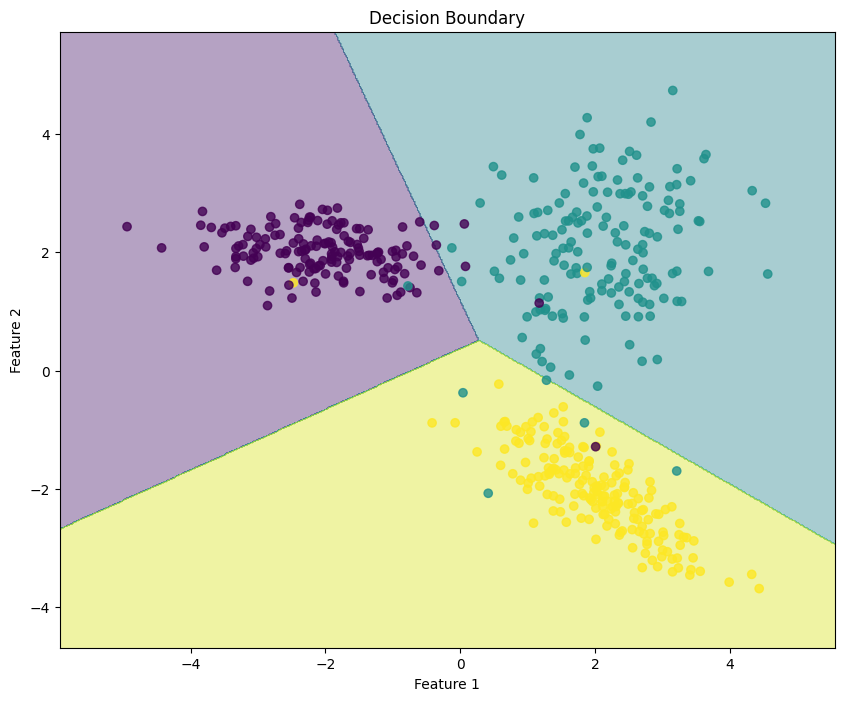

In [47]:
clf_syn.plot_decision_boundary(X_test, y_test, title="Decision Boundary")

### Different regularization parameters

In [48]:
lambdas = [0.1, 0.5, 1, 5, 10, 50, 100]
accuracies = []
for l in lambdas:
    clf_syn = MyClassifier(lambda_reg=l)
    clf_syn.train(X_train, y_train)
    y_pred = clf_syn.predict(X_test)
    accuracy = clf_syn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

In [49]:
print('The best lambda and its accuracy:', lambdas[np.argmax(accuracies)], np.max(accuracies))

The best lambda and its accuracy: 5 0.974


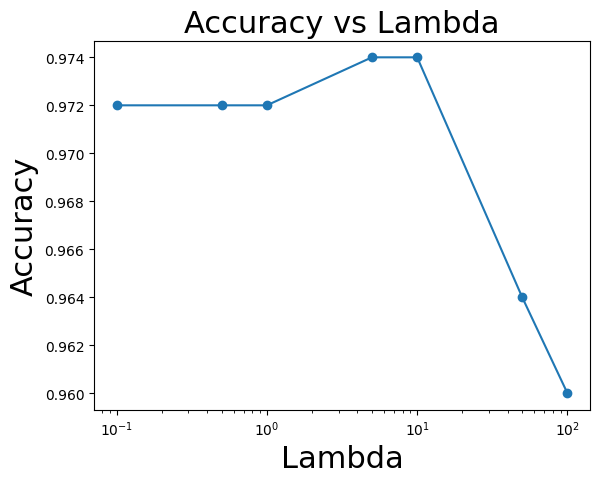

In [50]:
plt.scatter(lambdas, accuracies)
plt.plot(lambdas, accuracies)
plt.xlabel("Lambda", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Lambda", fontsize=22)
plt.xscale('log')
plt.show()

## Fashion MNIST

PCA has been used here to reduce the dimensionality of the data. The data has been reduced to different dimensions and the accuracy of the model has been calculated for each dimension. The accuracy has been plotted against the number of dimensions.

When the data is reduced to 2 dimensions, the decision boundary is plotted.

In [51]:
# load mnist data
mnist_data = prepare_mnist_data()

n_dim = [784, 500, 300, 100, 10, 5, 2]

### Full dimensionality

In [52]:
pca = PCA(n_components=n_dim[0]) 
X_train_reduced = pca.fit_transform(mnist_data['trainX'])
X_test_reduced = pca.transform(mnist_data['testX'])

trainX_reduced = X_train_reduced/255
testX_reduced = X_test_reduced/255
trainY = mnist_data['trainY']
testY = mnist_data['testY']

In [53]:
clf_mnist = MyClassifier()
clf_mnist.train(trainX_reduced, trainY)
y_pred = clf_mnist.predict(testX_reduced)

In [54]:
accs = clf_mnist.evaluate(testX_reduced, testY)
print(f"Accuracy: {accs*100:.2f}%")

Accuracy: 77.00%


#### Confusion Matrix

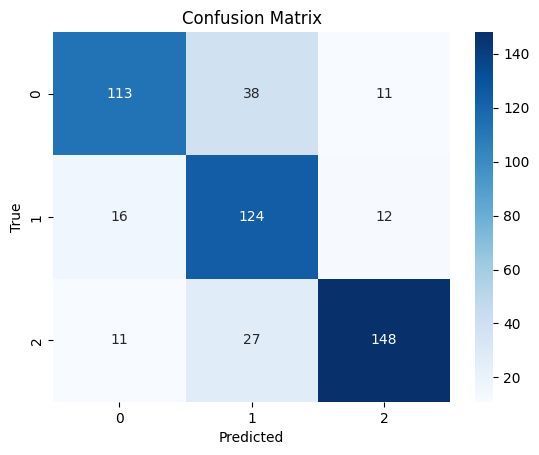

In [55]:
clf_mnist.plot_confusion_matrix(y_pred, testY)

### Different Dimensionality

In [56]:
# plot the accuracy vs number of dimensions
accs = []
for n in n_dim:
    pca = PCA(n_components=n)
    X_train_reduced = pca.fit_transform(mnist_data['trainX'])
    X_test_reduced = pca.transform(mnist_data['testX'])

    trainX_reduced = X_train_reduced/255
    testX_reduced = X_test_reduced/255
    trainY = mnist_data['trainY']
    testY = mnist_data['testY']

    clf_mnist = MyClassifier()
    clf_mnist.train(trainX_reduced, trainY)
    y_pred = clf_mnist.predict(testX_reduced)

    accs.append(clf_mnist.evaluate(testX_reduced, testY))

In [57]:
print(accs)
print('Max accuracy and occuring at n_dim:', max(accs), n_dim[accs.index(max(accs))])

[0.77, 0.862, 0.868, 0.88, 0.902, 0.874, 0.676]
Max accuracy and occuring at n_dim: 0.902 10


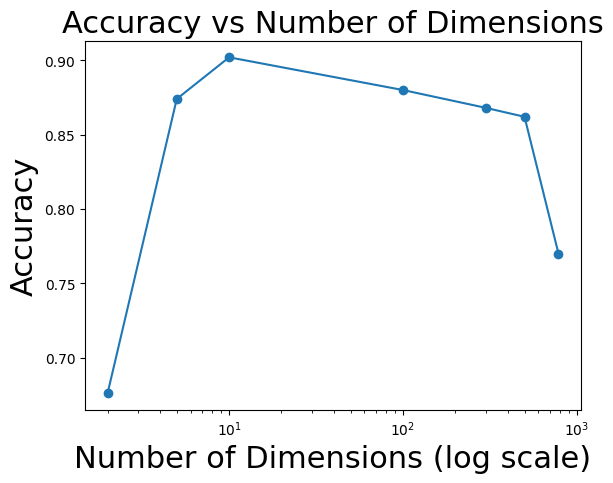

In [58]:
#scatter with line plot and dim on log scale
plt.scatter(n_dim, accs)
plt.plot(n_dim, accs)
plt.xlabel("Number of Dimensions (log scale)", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Number of Dimensions", fontsize=22)
plt.xscale('log')
plt.show()

### Decision Boundary (only 2 features using PCA)

In [59]:
pca = PCA(n_components=n_dim[-1])  # Reduce to 50 dimensions
X_train_reduced = pca.fit_transform(mnist_data['trainX'])
X_test_reduced = pca.transform(mnist_data['testX'])

trainX_reduced = X_train_reduced/255
testX_reduced = X_test_reduced/255
trainY = mnist_data['trainY']
testY = mnist_data['testY']

In [60]:
clf_mnist = MyClassifier()
clf_mnist.train(trainX_reduced, trainY)
y_pred = clf_mnist.predict(testX_reduced)

In [61]:
acc_mnist_2 = clf_mnist.evaluate(testX_reduced, testY)
print(f"Accuracy: {acc_mnist_2*100:.2f}%")

Accuracy: 67.60%


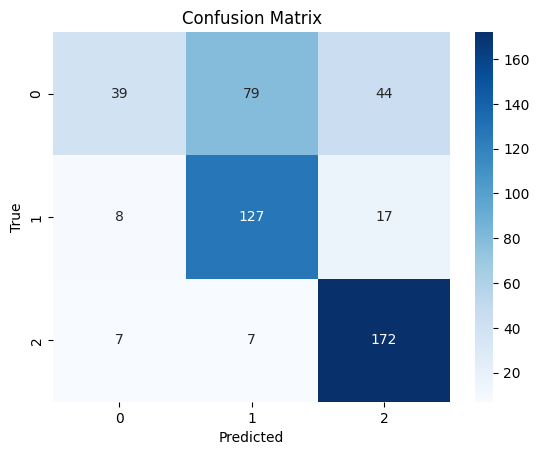

In [62]:
clf_mnist.plot_confusion_matrix(y_pred, testY)

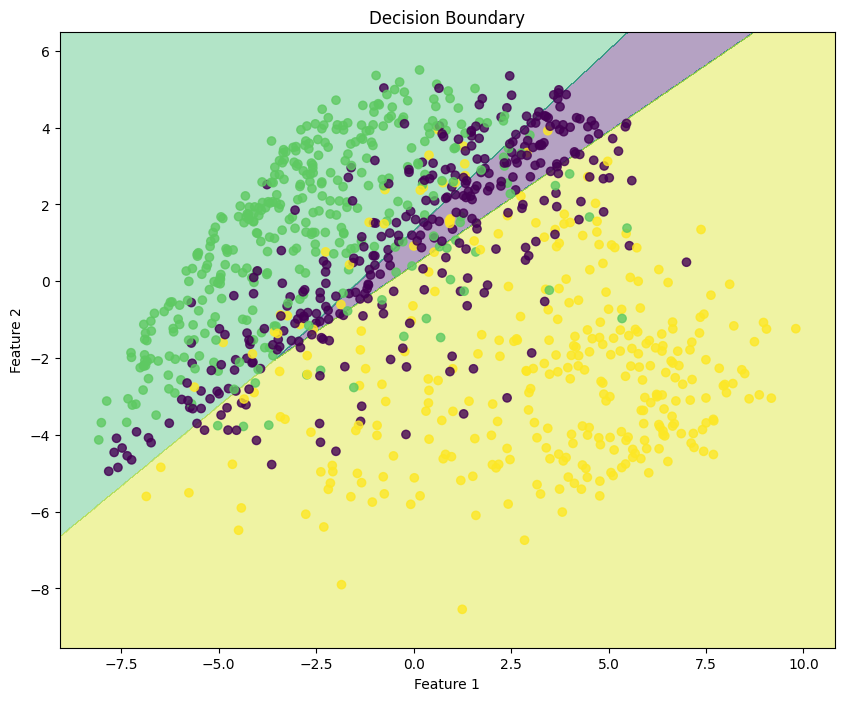

In [63]:
clf_mnist.plot_decision_boundary(trainX_reduced, trainY, title="Decision Boundary")

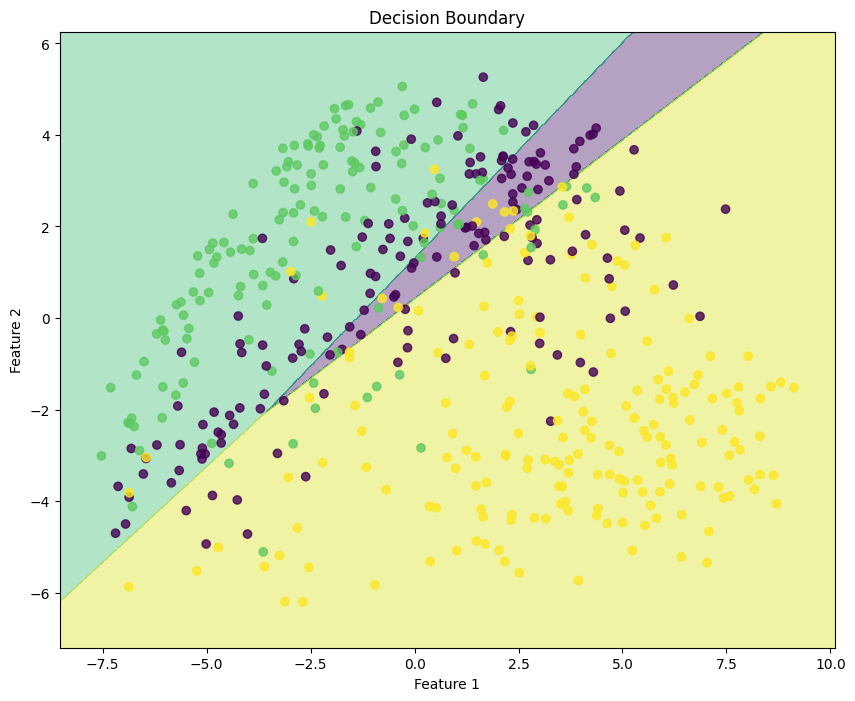

In [64]:
clf_mnist.plot_decision_boundary(testX_reduced, testY, title="Decision Boundary")

### Different Regularization Parameters

In [65]:
lambdas = [1e-4, 1e-2, 0.1, 1, 5, 10]
n_dim = 10 # max of accuracy vs number of dimensions
accuracies = []
for l in lambdas:
    pca = PCA(n_components=n_dim)  # Reduce to 10 dimensions as max accuracy occurs at 10
    X_train_reduced = pca.fit_transform(mnist_data['trainX'])
    X_test_reduced = pca.transform(mnist_data['testX'])

    trainX_reduced = X_train_reduced/255
    testX_reduced = X_test_reduced/255
    trainY = mnist_data['trainY']
    testY = mnist_data['testY']

    clf_mnist = MyClassifier(lambda_reg=l)
    clf_mnist.train(trainX_reduced, trainY)
    y_pred = clf_mnist.predict(testX_reduced)
    accuracy = clf_mnist.evaluate(testX_reduced, testY)
    accuracies.append(accuracy)

KeyboardInterrupt: 

In [26]:
print('The maximum accuracy and the lambda value:', max(accuracies), lambdas[accuracies.index(max(accuracies))])
acc_mnist = max(accuracies)

The maximum accuracy and the lambda value: 0.9 0.1


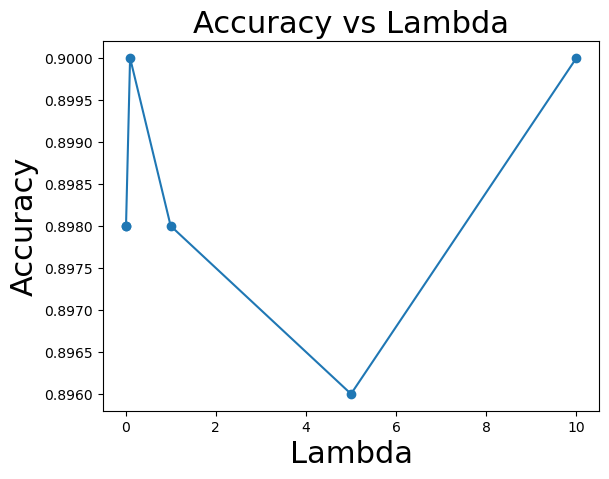

In [27]:
plt.scatter(lambdas, accuracies)
plt.plot(lambdas, accuracies)
plt.xlabel("Lambda", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Lambda", fontsize=22)
plt.show()

# Task 2

In [27]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)

K_synthetic = [3, 5, 10]
K_mnist = [3, 10, 32]

result2 = {}
nmi_list = []
accuracy_list = []
# Synthetic data experiments
for K in K_synthetic:
    data = prepare_synthetic_data()
    clustering_class = MyClustering(K)
    clustering_class.train(data['trainX'])
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    nmi = clustering_class.evaluate_clustering(data['trainY'])
    nmi_list.append(nmi)
    print(f"Clustering NMI for K={K}: {nmi}")
    accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    result2['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}
    # print(result2)

nmi_list = []
accuracy_list = []
# MNIST data experiments
for K in K_mnist:
    data = prepare_mnist_data()
    clustering_class = MyClustering(K)
    clustering_class.train(data['trainX'])
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    nmi = clustering_class.evaluate_clustering(data['trainY'])
    nmi_list.append(nmi)
    print(f"Clustering NMI for K={K}: {nmi}")
    accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    result2['mnist'] = {'K': K_mnist, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2)


# Task 1
result1 = {'synthetic_test_accuracy':0.9, 'mnist_test_accuracy':0.85}


# Task 2
# result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
#             'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}

# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
# result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
#             'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
                                                'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
                                                'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


# plot_result(result2=result2)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)

Number of components selected: 2
Explained variance covered: 1.00
Converged after 5 iterations.
Clustering NMI for K=3: 0.8278254854605318
Classification accuracy for K=3: 0.968
Number of components selected: 2
Explained variance covered: 1.00
Converged after 7 iterations.
Clustering NMI for K=5: 0.6932654011613067
Classification accuracy for K=5: 0.926
Number of components selected: 2
Explained variance covered: 1.00
Clustering NMI for K=10: 0.8698036614470138
Classification accuracy for K=10: 0.976
Number of components selected: 123
Explained variance covered: 0.95
Clustering NMI for K=3: 0.28164989346192487
Classification accuracy for K=3: 0.612
Number of components selected: 123
Explained variance covered: 0.95
Converged after 15 iterations.
Clustering NMI for K=10: 0.49775094067091064
Classification accuracy for K=10: 0.8
Number of components selected: 123
Explained variance covered: 0.95
Clustering NMI for K=32: 0.6043128706289214
Classification accuracy for K=32: 0.864
{'synthet

# Task 3

In [1]:
import numpy as np
from gekko import GEKKO
from MySolution import *
from utils import *

np.random.seed(42)

data = prepare_mnist_data()
trainX = data['trainX']
trainY = data['trainY'].astype(np.int64)

testX = data['testX']
testY = data['testY'].astype(np.int64)


In [2]:
num_features_list = [5, 20, 80, 320, 784]
# num_features_list = [80]


# Store the features being chosen for visualization later
classifier_features_dict = {}
clustering_features_dict = {}
random_features_dict = {}

# Store accuracy metrics
classifier_accuracy_selected = np.zeros(len(num_features_list))
classifier_accuracy_random = np.zeros(len(num_features_list))

clustering_accuracy_selected = np.zeros(len(num_features_list))
clustering_accuracy_random = np.zeros(len(num_features_list))

clustering_nmi_selected = np.zeros(len(num_features_list))
clustering_nmi_random = np.zeros(len(num_features_list))

random_selected_features_list = [np.random.choice(data['trainX'].shape[1], num_features, replace=False) for num_features in num_features_list]

Compute Supervised Learning Performance

In [ ]:
for i, num_features in enumerate(num_features_list):

    print(f"Processing num_features={num_features}")



    ##### Find the features to train the models on

    feature_selector = MyFeatureSelection(num_features)
    
    # Generate selected features from each of the 3 methods - supervised feature selection, unsupervised feature selection
    # and random feature selection
    classifier_selected_features = feature_selector.construct_new_features(trainX, trainY)
    random_selected_features = random_selected_features_list[i]

    # Save the selected features for visualization
    classifier_features_dict[num_features] = classifier_selected_features
    random_features_dict[num_features] = random_selected_features

    # Restrict trainX to the features selected
    trainX_classifier_selected = trainX[:, classifier_selected_features]
    trainX_random_selected = trainX[:, random_selected_features]

    # Restrict trainY to the features selected
    testX_classifier_selected = testX[:, classifier_selected_features]
    testX_random_selected = testX[:, random_selected_features]



    ##### Train the models using the selected features

    print(f"    Training Classifiers")
    # Train Classifier with Selected and Random Features
    classifier_selected = MyClassifier()
    classifier_selected.train(trainX_classifier_selected, trainY)
    # ----
    classifier_random = MyClassifier()
    classifier_random.train(trainX_random_selected, trainY)
    


    ##### Evaluate the model performances on the test set

    print(f"    Evaluating Classifiers")
    classifier_accuracy_selected[i] = classifier_selected.evaluate(testX_classifier_selected, testY)
    classifier_accuracy_random[i] = classifier_random.evaluate(testX_random_selected, testY)



Processing num_features=5
doing classification feature selection
 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  3
   Constants    :  2353
   Variables    :  3144
   Intermediates:  0
   Connections  :  2355
   Equations    :  2357
   Residuals    :  2357
 
 Number of state variables:    3144
 Number of total equations: -  2359
 Number of slack variables: -  4
 ---------------------------------------
 Degrees of freedom       :    781
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.42 NLPi:    5 Dpth:    0 Lvs:    3 Obj: -2.34E+02 Gap:       NaN
--Integer Solution:  -2.20E+02 Lowest Leaf:  -2.34E+02 Gap:   6.11E-02
Iter:     2 I:  0 Tm:     

Compute Unsupervised Learning Performance

In [3]:
for i, num_features in enumerate(num_features_list):

    print(f"Processing num_features={num_features}")


    ##### Find the features to train the models on

    feature_selector = MyFeatureSelection(num_features)
    
    # Generate selected features from each of the 3 methods - supervised feature selection, unsupervised feature selection
    # and random feature selection
    clustering_selected_features = feature_selector.construct_new_features(trainX)
    random_selected_features = random_selected_features_list[i]

    # Save the selected features for visualization
    clustering_features_dict[num_features] = clustering_selected_features
    random_features_dict[num_features] = random_selected_features

    # Restrict trainX to the features selected
    trainX_clustering_selected = trainX[:, clustering_selected_features]
    trainX_random_selected = trainX[:, random_selected_features]

    # Restrict testX to the features selected
    testX_clustering_selected = testX[:, clustering_selected_features]
    testX_random_selected = testX[:, random_selected_features]



    ##### Train the models using the selected features

    print(f"    Training Clusterers")
    # Train Clusterer with Selected and Random Features
    # Use clustering size 10 according to instructions

    # For num_features=5, must use num_clusters 5 to avoid error
    # Use the minimum of 10, and the number of features in all cases
    clusterer_selected = MyClustering(min(num_features, 10))
    clusterer_selected.train(trainX_clustering_selected)
    # ----
    clusterer_random = MyClustering(min(num_features, 10))
    clusterer_random.train(trainX_random_selected)
    


    ##### Evaluate the model performances on the test set
    
    print(f"    Evaluating Clusterers")
    # Accuracy
    clustering_accuracy_selected[i] = clusterer_selected.evaluate_classification(trainY, testX_clustering_selected, testY)
    clustering_accuracy_random[i] = clusterer_random.evaluate_classification(trainY, testX_random_selected, testY)

    # NMI
    clustering_nmi_selected[i] = clusterer_selected.evaluate_clustering(trainY)
    clustering_nmi_random[i] = clusterer_random.evaluate_clustering(trainY)



Processing num_features=5
doing clustering feature selection
 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  1
   Constants    :  785
   Variables    :  1572
   Intermediates:  0
   Connections  :  785
   Equations    :  787
   Residuals    :  787
 
 Number of state variables:    1572
 Number of total equations: -  787
 Number of slack variables: -  2
 ---------------------------------------
 Degrees of freedom       :    783
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.50 NLPi:    4 Dpth:    0 Lvs:    0 Obj: -4.69E+04 Gap:  0.00E+00
 Successful solution
 
 ---------------------------------------------------
 Solver         :  APOPT (v1.0

n:\GitHub\ece236_project\src\MySolution.py:296: RuntimeWarning: invalid value encountered in divide
  centroid = weighted_sum / weights.sum()


Number of components selected: 10
Explained variance covered: 0.95
    Evaluating Clusterers


ValueError: attempt to get argmax of an empty sequence

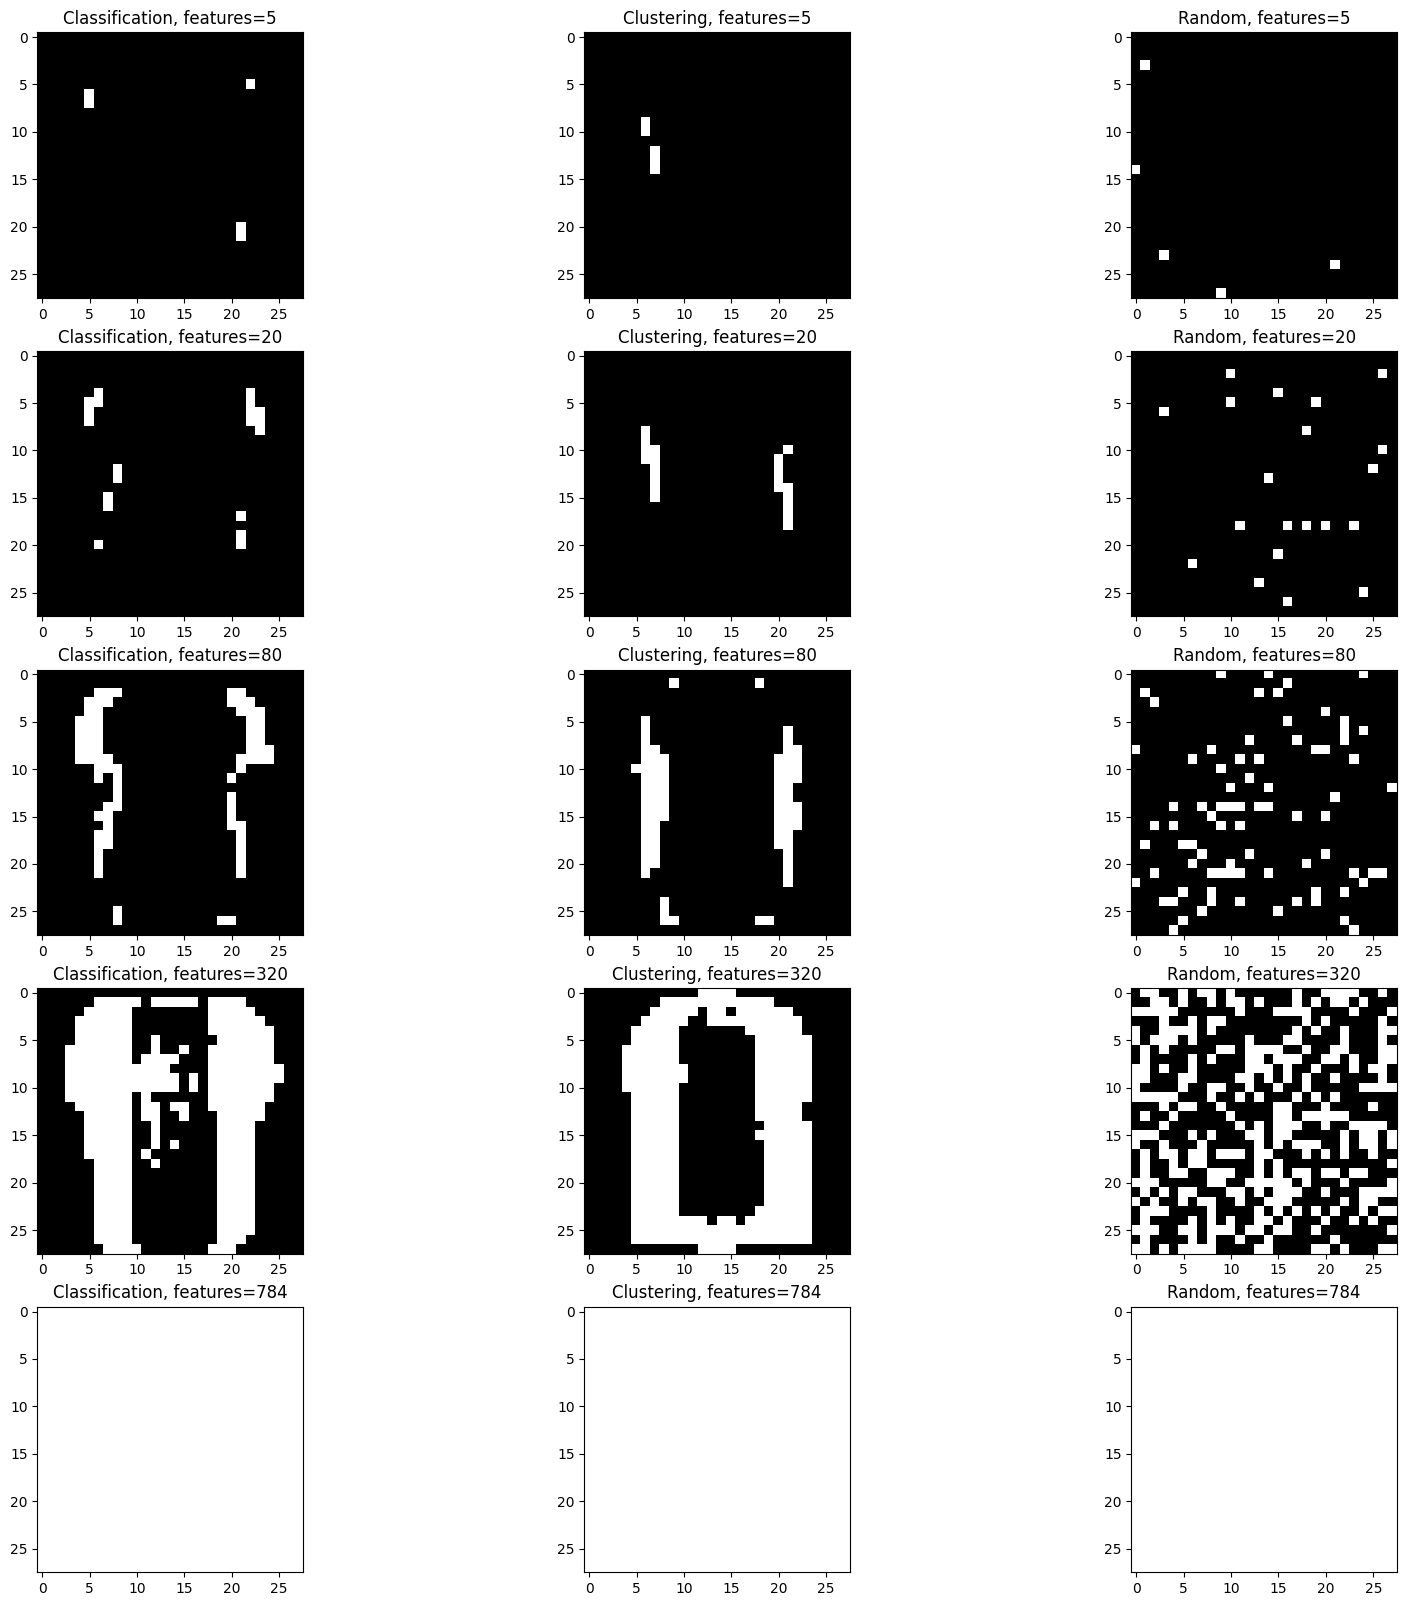

In [ ]:
fig, axs = plt.subplots(5,3)

fig.set_figheight(20)
fig.set_figwidth(20)

for i, num_features in enumerate(num_features_list):
    img = np.zeros(784)
    img[classifier_features_dict[num_features]] = 1
    axs[i,0].imshow(img.reshape(28,28), cmap='gray', vmin=0, vmax=1)
    axs[i,0].set_title(f"Classification, features={num_features}")

    img = np.zeros(784)
    img[clustering_features_dict[num_features]] = 1
    axs[i,1].imshow(img.reshape(28,28), cmap='gray', vmin=0, vmax=1)
    axs[i,1].set_title(f"Clustering, features={num_features}")
    
    img = np.zeros(784)
    img[random_features_dict[num_features]] = 1
    axs[i,2].imshow(img.reshape(28,28), cmap='gray', vmin=0, vmax=1)
    axs[i,2].set_title(f"Random, features={num_features}")

In [68]:
result3_2 = {'feature_number':                  [5, 20, 80, 320, 784], 
            #  'classifier_accuracy(our algo)':   classifier_accuracy_selected, 
            #  'classifier_accuracy(random)':     classifier_accuracy_random, 
            # CLASSIFIER TAKES SO LONG TO RUN - USE PLACEHOLDER
             'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 
             'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6],
             'clustering_accuracy(our algo)':   clustering_accuracy_selected, 
             'clustering_accuracy(random)':     clustering_accuracy_random, 
             'nmi(our algo)':                   clustering_nmi_selected, 
             'nmi(random)':                     clustering_nmi_random}

# Final Combine

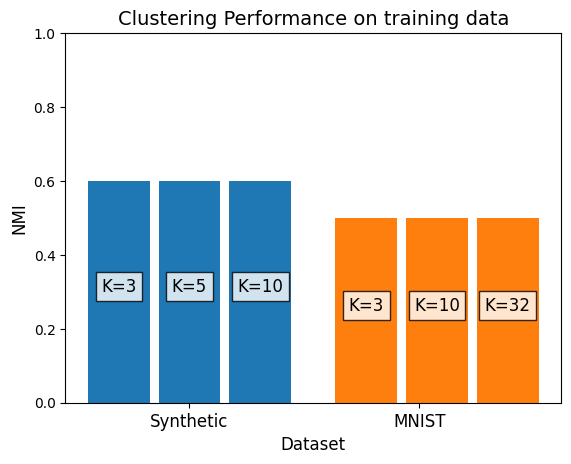

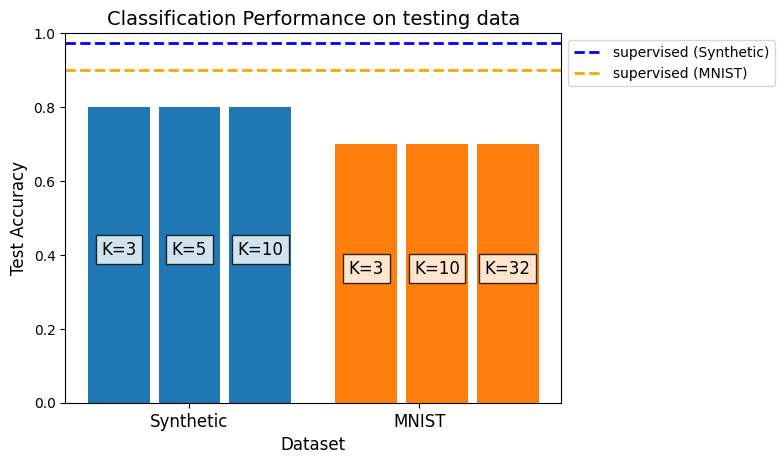

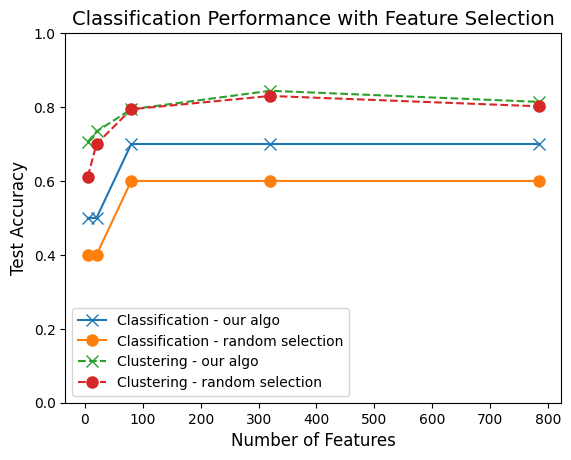

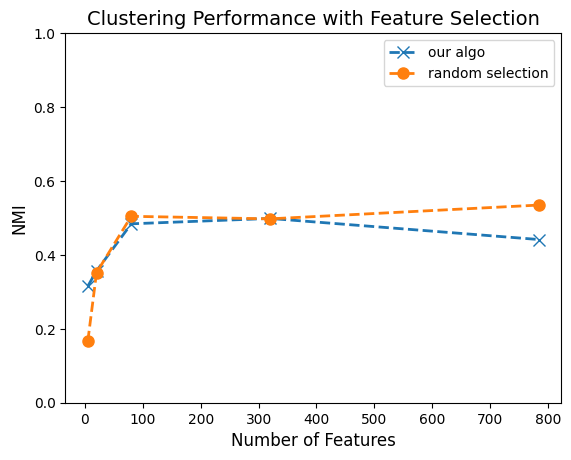

In [69]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)


# Task 1
# result1 = {'synthetic_test_accuracy':acc_syn, 'mnist_test_accuracy':acc_mnist}
# Use the computed values so we don't have to re-run
result1 = {'synthetic_test_accuracy':0.972, 'mnist_test_accuracy':0.9}

# Task 2
result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
            'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}

# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
# result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
#             'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

# result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
#                                                 'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
#                                                 'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)